<a href="https://colab.research.google.com/github/mkgreen/K-means-Clustering-Employee-Compensation/blob/main/step%202%20Unsupervised_Learning_k_means_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries and Loading Data**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# **Exploratory Data Analysis (EDA)**

In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 683277 rows and 22 columns.


In [4]:
# checking for missing data
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
print("Missing Value Counts + Percentages")
print("-"*34)
for feature in features_na:

    print(f"* {feature}: {df[feature].isna().sum()} values, {np.round(df[feature].isnull().mean(),4)}% of entries")
else:
    print()
    print("no other missing values found in dataset")

Missing Value Counts + Percentages
----------------------------------
* Department Code: 2 values, 0.0% of entries
* Department: 2 values, 0.0% of entries
* Union Code: 351 values, 0.0005% of entries
* Union: 351 values, 0.0005% of entries
* Job: 5 values, 0.0% of entries

no other missing values found in dataset


In [5]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

There are 711 missing values in this dataset.


In [6]:
df = df.dropna()

In [7]:
df.isnull().values.any()

False

In [8]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [9]:
# df.info()

In [10]:
columns = df.columns.values
print("Features: ",columns)

Features:  ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


## **Data Preprocessing**


In [11]:
# creating a copy of the data
df1 = df.copy()

In [12]:
# # merging columns
# df1['Total Benefits'] = df1['Retirement']+df1['Other Benefits']+df1['Health and Dental']
# df1 = df1.drop(['Retirement','Other Benefits','Health and Dental'])

In [13]:
df1.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

# **Selecting features with numerical values**

In [14]:
df2 = df1.select_dtypes(include=['float64','int64'])
df2.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,21.0,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,21.0,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,21.0,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,21.0,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,21.0,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# **Selecting and encoding categorical data**

In [15]:
df3 = df1.select_dtypes(include=['object'])
df3.head()

,Job Family Code,Job Code,Year Type,Organization Group,Department Code,Department,Union,Job Family,Job
0,1000,1021,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1
1,1000,1023,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3
2,1000,1031,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant
3,1000,1054,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal
4,1000,1062,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst


In [16]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df3.columns

Index(['Job Family Code', 'Job Code', 'Year Type', 'Organization Group',
       'Department Code', 'Department', 'Union', 'Job Family', 'Job'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df['Year Type'] = Le.fit_transform(df['Year Type'])
df['Job Family Code'] = Le.fit_transform(df['Job Family Code'])
df['Job Code'] = Le.fit_transform(df['Job Code'])
df['Organization Group'] = Le.fit_transform(df['Organization Group'])
df['Department Code'] = Le.fit_transform(df['Department Code'])
df['Department'] = Le.fit_transform(df['Department'])
df['Union'] = Le.fit_transform(df['Union'])
df['Job Family'] = Le.fit_transform(df['Job Family'])
df['Job'] = Le.fit_transform(df['Job'])

In [18]:
df3 = df.copy()
df3.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2,67,0,2013,5,2,2,21.0,87,...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2,69,0,2013,5,2,2,21.0,87,...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2,71,0,2013,5,2,2,21.0,87,...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2,81,0,2013,5,2,2,21.0,87,...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2,83,0,2013,5,2,2,21.0,87,...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# **Correlation**

In [19]:
df1.corr()
# df3.corr()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.000000,-0.000739,-0.007622,-0.000127,-0.192193,-0.297148,-0.199114,-0.263737,-0.234043,-0.226596,0.033051,-0.198114,-0.252369
Year,-0.000739,1.000000,0.005062,0.838864,0.125359,0.080819,0.006868,0.124209,0.100283,0.161265,0.102378,0.130183,0.127971
Union Code,-0.007622,0.005062,1.000000,0.006612,-0.095214,0.059536,0.126445,-0.048236,-0.108699,-0.105931,-0.325772,-0.164552,-0.077875
Employee Identifier,-0.000127,0.838864,0.006612,1.000000,0.130454,0.081682,0.006995,0.128231,0.103564,0.173667,0.094212,0.134287,0.132088
Salaries,-0.192193,0.125359,-0.095214,0.130454,1.000000,0.259264,0.255913,0.957338,0.947378,0.758019,0.727065,0.933363,0.969026
Overtime,-0.297148,0.080819,0.059536,0.081682,0.259264,1.000000,0.291750,0.501851,0.311004,0.299711,0.091801,0.291585,0.459111
Other Salaries,-0.199114,0.006868,0.126445,0.006995,0.255913,0.291750,1.000000,0.415436,0.279850,0.155722,0.051402,0.219198,0.374574
Total Salary,-0.263737,0.124209,-0.048236,0.128231,0.957338,0.501851,0.415436,1.000000,0.928025,0.745272,0.652867,0.902593,0.994322
Retirement,-0.234043,0.100283,-0.108699,0.103564,0.947378,0.311004,0.279850,0.928025,1.000000,0.782658,0.677758,0.960589,0.953149
Health and Dental,-0.226596,0.161265,-0.105931,0.173667,0.758019,0.299711,0.155722,0.745272,0.782658,1.000000,0.626676,0.896516,0.796369


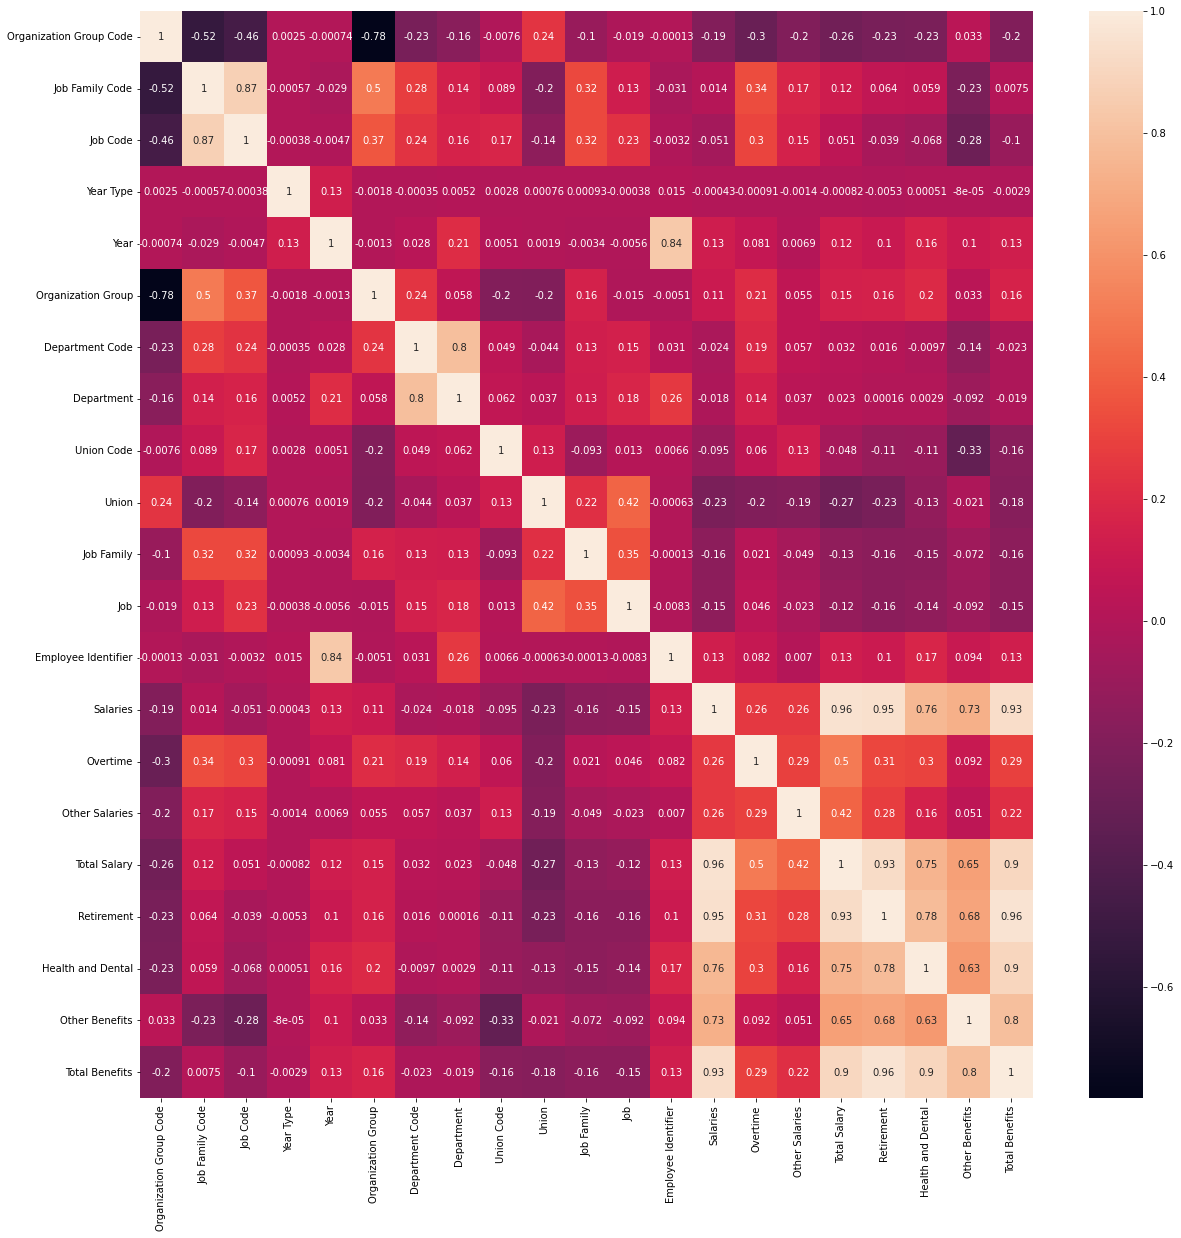

In [20]:
import seaborn as sns
# corr=df1.iloc[:,:-1].corr()
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)
plt.show()

In [21]:
threshold=0.8

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    # corr_matrix = df1.corr()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
correlation(df1.iloc[:,:-1],threshold)
# correlation(df.iloc[:,:-1],threshold)

{'Employee Identifier',
 'Job Code',
 'Retirement',
 'Total Benefits',
 'Total Compensation',
 'Total Salary'}

# **Model Optimization**

In [23]:
data = df.copy()

In [24]:
data = data.drop(['Organization Group Code','Other Benefits','Health and Dental','Overtime','Other Salaries','Job','Salaries','Union','Job Family','Union Code','Department','Department Code','Organization Group','Year','Job Family Code','Year Type'],axis=1)

In [25]:
data.head()

,Job Code,Employee Identifier,Total Salary,Retirement,Total Benefits,Total Compensation
0,67,37730,57534.65,11253.16,27747.13,85281.78
1,69,26574,57678.50,10284.88,22216.82,79895.32
2,71,8148,63532.93,12495.83,30116.78,93649.71
3,81,27436,94215.92,19644.45,40021.45,134237.37
4,83,37730,5084.00,1083.90,2428.31,7512.31


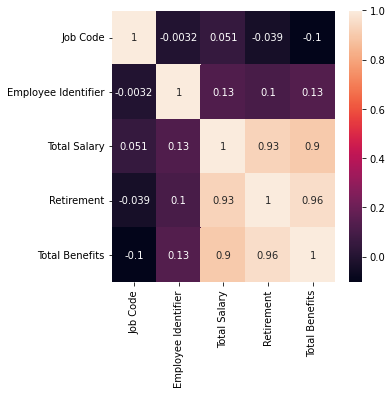

In [27]:
corr=data.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(5,5))
sns.heatmap(data[top_features].corr(),annot=True)
plt.show()